## Simple Neural Network Training

In [1]:
%matplotlib widget  
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

Let's use linear function to create ideal dataset (without noise) and model simple neural network to predict test dataset $$f(x) = ax_1 + bx_2$$, where `a` and `b` are constants..

In [2]:
# Define the linear function
def f(x, a, b):
    f = a * x[:,0] + b * x[:,1]
    return f.unsqueeze(1)

# Define the constants a, b, and c
a, b = 2, 1


# Create a synthetic dataset
x_train = torch.randn(10000, 2)
# y_train = (2*x_train[:,0] + x_train[:,1]).unsqueeze(1) #torch.sum(x_train, axis=1).view(-1, 1)
y_train = f(x_train, a, b)

x_val = torch.randn(200, 2)
# y_val = (2*x_val[:,0]+x_val[:,1]).unsqueeze(1)
y_val = f(x_val, a, b)


## Neural Network (2 input 2 hidden layer 1 output) 

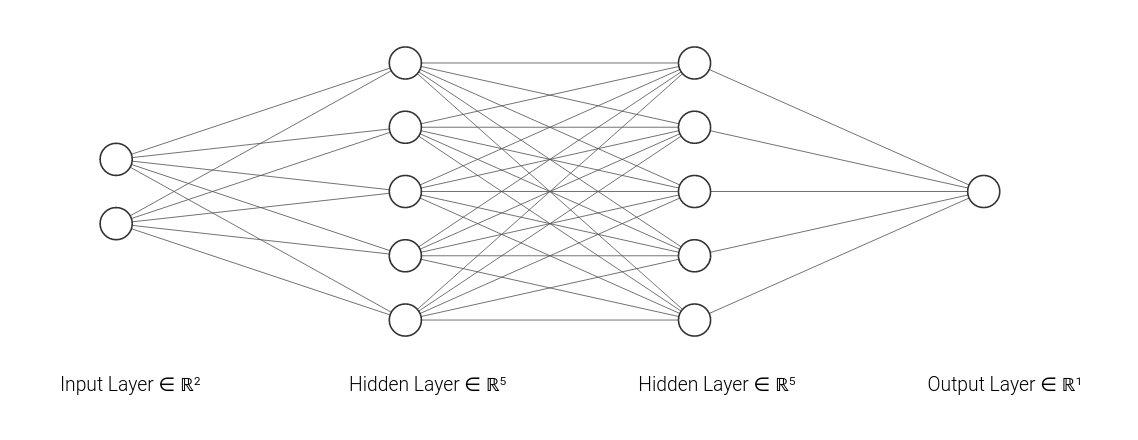

https://alexlenail.me/NN-SVG/

In [3]:
# Define a simple neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc_in = nn.Linear(2, 5)  # Define Fully connected input layer : 2 input features, 5 nodes in hidden layer
        self.fc_h1 = nn.Linear(5, 5)  # Define Fully connected hidden layer : 5 input features, 5 nodes in hidden layer
        self.fc_out = nn.Linear(5, 1)   # Define Fully connected hidden layer : 5 input features, 1 nodes in hidden layer

    def forward(self, x):
        y1 = self.fc_in(x)
        y1 = torch.relu(y1)

        y2 = self.fc_h1(y1)
        y2 = torch.relu(y2)

        y3 = self.fc_out(y2)
        return y3

In [4]:
# Create the network
simpleNN_model = Net()

Epoch: 1, Training Loss: 49.0849609375, Validation Loss: 4.9133687019348145
Epoch: 2, Training Loss: 49.05265808105469, Validation Loss: 4.9099273681640625
Epoch: 3, Training Loss: 49.01880645751953, Validation Loss: 4.906304836273193
Epoch: 4, Training Loss: 48.983001708984375, Validation Loss: 4.902487277984619
Epoch: 5, Training Loss: 48.94516372680664, Validation Loss: 4.898454189300537
Epoch: 6, Training Loss: 48.9049072265625, Validation Loss: 4.894118785858154
Epoch: 7, Training Loss: 48.861480712890625, Validation Loss: 4.889450550079346
Epoch: 8, Training Loss: 48.81446838378906, Validation Loss: 4.884195327758789
Epoch: 9, Training Loss: 48.76368713378906, Validation Loss: 4.8783721923828125
Epoch: 10, Training Loss: 48.708702087402344, Validation Loss: 4.872236728668213
Epoch: 11, Training Loss: 48.649208068847656, Validation Loss: 4.865751266479492
Epoch: 12, Training Loss: 48.58527374267578, Validation Loss: 4.858895301818848
Epoch: 13, Training Loss: 48.5167121887207, Val

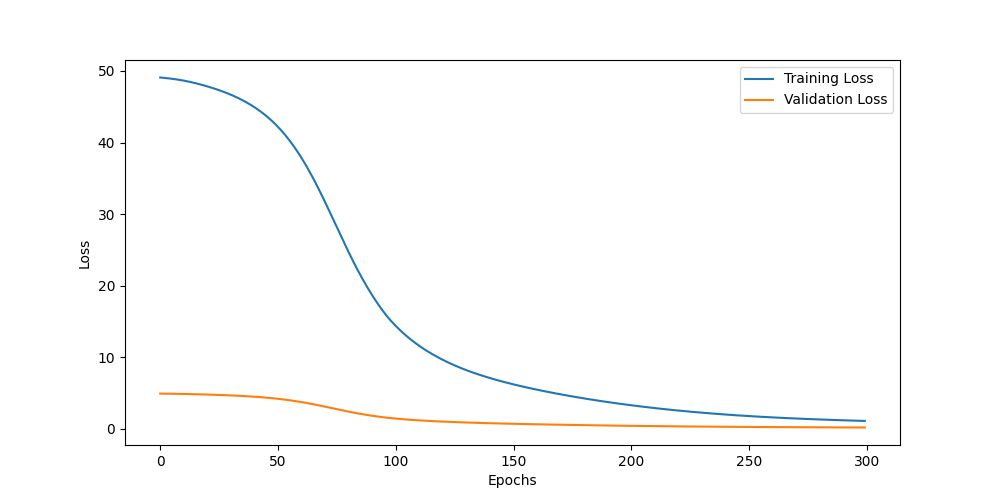

In [5]:

# Define a loss function and an optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(simpleNN_model.parameters(), lr=0.001)

# Prepare lists to save the losses
train_losses = []
val_losses = []

c = 10

# Train the network
for epoch in range(300):  # loop over the dataset multiple times
    simpleNN_model.train()
    optimizer.zero_grad()   # zero the gradient buffers
    y_predict = simpleNN_model(x_train)   # forward pass
    loss = c*criterion(y_predict, y_train)  # compute loss
    loss.backward()         # backpropagation
    optimizer.step()        # update weights

    simpleNN_model.eval()
    with torch.no_grad():
        val_output = simpleNN_model(x_val)
        val_loss = criterion(val_output, y_val)

    train_losses.append(loss.item())
    val_losses.append(val_loss.item())
    print(f'Epoch: {epoch+1}, Training Loss: {loss.item()}, Validation Loss: {val_loss.item()}')

print('Finished Training')

# Save the model
torch.save(simpleNN_model.state_dict(), 'SimpleNNmodel.pth')

# Plot the training and validation losses
plt.figure(figsize=(10,5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig("loss.png")
plt.show()

In [ ]:
# Load the model
model = Net()
model.load_state_dict(torch.load('SimpleNNmodel.pth'))

x_test = torch.randn(1,2)
y_expected = f(x_test, a, b)
print("x_test : ",x_test)
print("y_expected : ",y_expected)

y_predicted = model(x_test)
print("y_predicted : ",y_predicted)


x_test :  tensor([[-1.0417,  0.4362]])
y_expected :  tensor([[-1.6471]])
y_predicted :  tensor([[-1.7159]], grad_fn=<AddmmBackward0>)


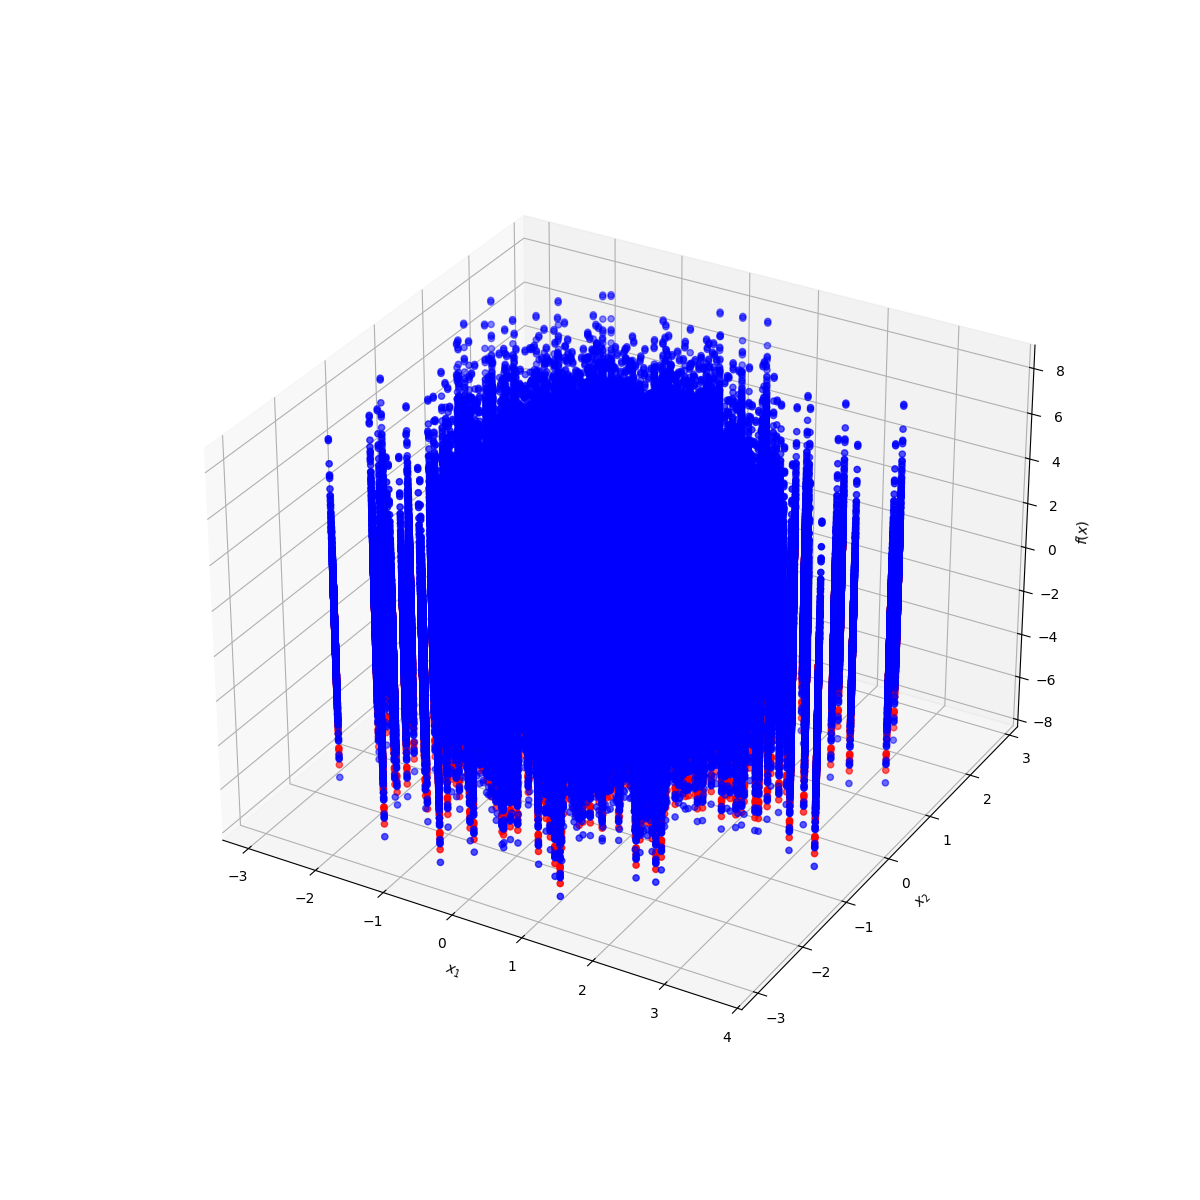

In [ ]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
x_test = torch.randn(200,2)
y_predicted = model(x_test)

ax.scatter(x_test[:,0], x_test[:,1], f(x_test, a, b), c='b', marker='o')
ax.scatter(x_test[:,0], x_test[:,1], y_predicted.detach(), c='r', marker='o')

ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$f(x)$')

plt.show()